In [ ]:
import random
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential



In [ ]:
#carga del DataSet entrenamiento 
categorias_tr = tf.keras.utils.image_dataset_from_directory(
    './train/',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(300, 300))
    
    
    
            


In [ ]:
class_names= categorias_tr.class_names

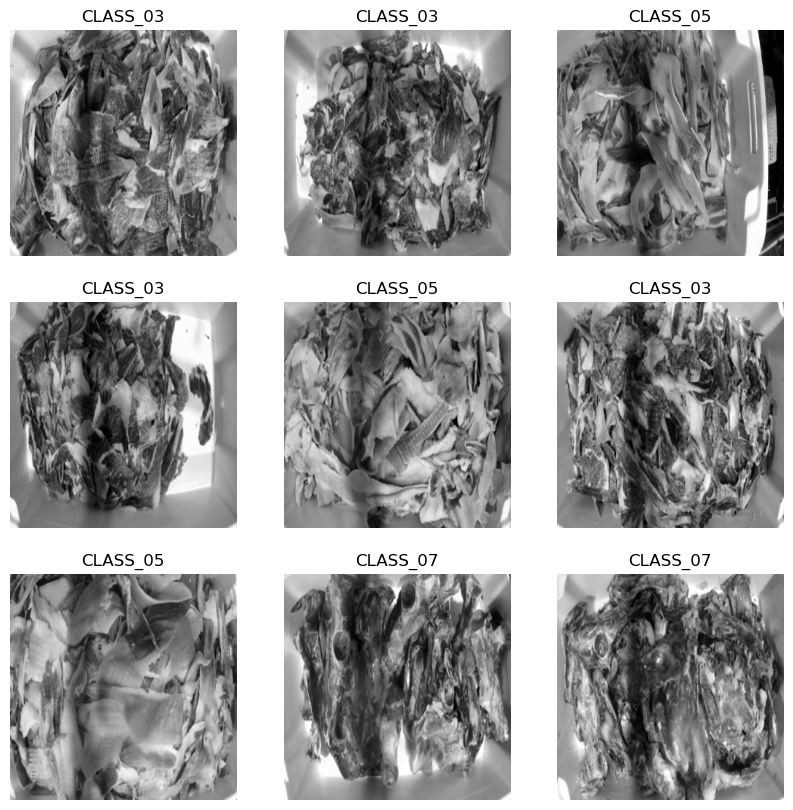

In [20]:

plt.figure(figsize=(10, 10))
for images, labels in categorias_tr.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        # Convertir la imagen a formato BGR (si está en formato RGB)
        img_bgr = cv2.cvtColor(images[i].numpy().astype("uint8"), cv2.COLOR_RGB2BGR)
        # Aplicar el cambio de color a la imagen (por ejemplo, convertir a escala de grises)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        # Mostrar la imagen modificada
        plt.imshow(img_gray, cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")     
plt.show()

        

In [6]:
!pip install  opencv-python








In [19]:
print(class_names)

['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


In [21]:
#define un modelo de red neuronal convolucional (CNN) 

num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    ])

In [22]:
#utilizando el optimizador Adam
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])        
             

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)       

In [11]:
#Realiza el entrenamiento del modelo utilizando el conjunto de datos con el fin de aprender 
epochs=20
history = model.fit(
    categorias_tr ,
    epochs=epochs
) 



Epoch 1/20
41/41 [==============================] - 43s 992ms/step - loss: 1.4100 - accuracy: 0.5792
Epoch 2/20
41/41 [==============================] - 43s 925ms/step - loss: 0.7624 - accuracy: 0.7093
Epoch 3/20
41/41 [==============================] - 47s 1s/step - loss: 0.4185 - accuracy: 0.8470
Epoch 4/20
41/41 [==============================] - 51s 1s/step - loss: 0.2986 - accuracy: 0.8921
Epoch 5/20
41/41 [==============================] - 50s 1s/step - loss: 0.1601 - accuracy: 0.9510
Epoch 6/20
41/41 [==============================] - 49s 1s/step - loss: 0.0559 - accuracy: 0.9878
Epoch 7/20
41/41 [==============================] - 50s 1s/step - loss: 0.0237 - accuracy: 0.9946
Epoch 8/20
41/41 [==============================] - 52s 1s/step - loss: 0.0103 - accuracy: 0.9992
Epoch 9/20
41/41 [==============================] - 50s 1s/step - loss: 0.0046 - accuracy: 1.0000
Epoch 10/20
41/41 [==============================] - 49s 1s/step - loss: 0.0031 - accuracy: 1.0000
Epoch 11/20
4

In [24]:
#evaluar el modelo del conjunto train
model.evaluate(categorias_tr, return_dict=True)

41/41 [==============================] - 16s 250ms/step - loss: 2.0445 - accuracy: 0.1354


{'loss': 2.044518232345581, 'accuracy': 0.1354246437549591}

# Evaluacion de conjunto de pruebas

In [25]:
categoria_test = tf.keras.utils.image_dataset_from_directory(
          './test/',
           seed = 123,
           image_size = (300 , 300))


Found 810 files belonging to 8 classes.


In [26]:
#evaluado la categoria
model.evaluate(categoria_test, return_dict=True)


26/26 [==============================] - 11s 234ms/step - loss: 2.0461 - accuracy: 0.1210


{'loss': 2.0461137294769287, 'accuracy': 0.1209876537322998}

In [27]:
#evaluacion de una imagen  Test 
image_path = './test/imagentest2.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize((300, 300))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)


1/1 [==============================] - 3s 3s/step


In [28]:
score = tf.nn.softmax(predictions[0])
print(
    "esta imagen pertenece a la {} con un {: .2f}  % de exactitud."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
     


esta imagen pertenece a la CLASS_03 con un  13.83  % de exactitud.


In [29]:
model.save('modelo')

INFO:tensorflow:Assets written to: modelo\assets


INFO:tensorflow:Assets written to: modelo\assets


Found 810 images belonging to 8 classes.


C:\Users\HP\AppData\Local\Temp\ipykernel_2328\434436909.py:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0000    0.0000    0.0000        48
           2     0.1134    0.8557    0.2002        97
           3     0.0000    0.0000    0.0000        45
           4     0.0000    0.0000    0.0000       459
           5     0.0000    0.0000    0.0000        19
           6     0.1509    0.0702    0.0958       114
           7     0.1250    0.1111    0.1176        27

    accuracy                         0.1160       810
   macro avg     0.0487    0.1296    0.0517       810
weighted avg     0.0390    0.1160    0.0414       810



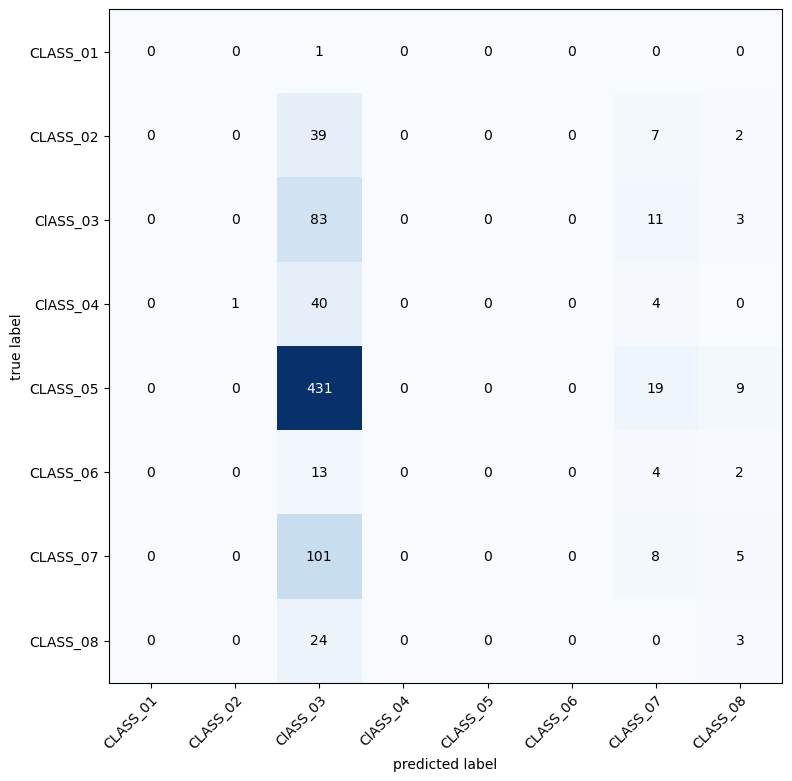

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score,roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

width_shape = 300
height_shape = 300

names = ['CLASS_01', 'CLASS_02', 'ClASS_03','ClASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']

test_data_dir = './test/'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (width_shape, height_shape),
    class_mode='categorical',
    shuffle = False)

##para la grafica he usado el modelo que ya fue guardado y entrenado con imagenes train vs el dataset de test
custom_Model = load_model("modelo")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc = confusion_matrix(y_real, y_pred)
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()
print(metrics.classification_report(y_real, y_pred, digits = 4))



